# Task 1: Classify customer reviews into positive, negative, or neutral categories to help the company improve its products and services. 

### Load Kaggle credentials from .env and download dataset securely

1. Reads Kaggle API credentials (username + key) from a .env file.
2. Sets them as environment variables so the Kaggle API can use them.
3. Downloads and unzips the dataset into your local `data/` folder.

In [7]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Set them for Kaggle API to use
os.environ["KAGGLE_USERNAME"] = os.getenv("KAGGLE_USERNAME")
os.environ["KAGGLE_KEY"] = os.getenv("KAGGLE_KEY")

# Create data folder
os.makedirs("../data", exist_ok=True)

# Download the dataset
api.dataset_download_files(
    "datafiniti/consumer-reviews-of-amazon-products",
    path="../data",
    unzip=True
)

print("✅ Dataset downloaded to /data/")


Dataset URL: https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products
✅ Dataset downloaded to /data/


### Load and Explore data

Load all the files and explore them.

In [ ]:
# import pandas as pd

# # List your CSV files
# file_paths = [
#     "../data/1429_1.csv",
#     "../data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv",
#     "../data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv",
# ]

# # Show all columns when printing and avoid showing the ...
# pd.set_option('display.max_columns', None)

# # Function to summarize a DataFrame
# def summarize_df(df):
#     print("==== BASIC INFO ====")
#     print("Number of rows:", df.shape[0])
#     print("Number of columns:", df.shape[1])
#     print("\nData types:\n", df.dtypes)
    
#     print("\n==== MISSING VALUES (%) ====")
#     missing_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
#     print(missing_percent[missing_percent > 0])
    
#     print("\n==== UNIQUE & TOP VALUES ====")
#     for col in df.columns:
#         if df[col].nunique() < 10:
#             print(f"{col}: {df[col].value_counts(dropna=False).to_dict()}")
#         else:
#             top_vals = df[col].value_counts(dropna=True).head(5)
#             print(f"{col} top 5 frequent values:\n{top_vals}\n")
    
#     print("\n==== SAMPLE ROWS ====")
#     print(df.head())
    
#     print("\n==== CORRELATIONS (numeric only) ====")
#     numeric_cols = df.select_dtypes(include='number').columns
#     if len(numeric_cols) > 0:
#         print(df[numeric_cols].corr())
#     else:
#         print("No numeric columns to show correlation.")
    
#     print("\n==== HISTOGRAMS ====")
#     import matplotlib.pyplot as plt
#     for col in numeric_cols:
#         df[col].hist(bins=20)
#         plt.title(f"Histogram of {col}")
#         plt.show()

# # Loop over files
# for path in file_paths:
#     print(f"\n===== FILE: {path} =====\n")
#     df = pd.read_csv(path, low_memory=False)
#     summarize_df(df)


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load only the `1429_1.csv` which is the smaller one to explore it and make decisions for pre-processing.

In [86]:
# Load the small file
df_small_file = pd.read_csv("../data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv", low_memory=False)

# Show all columns fully
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Basic Info
print("Number of rows:", df_small_file.shape[0])
print("Number of columns:", df_small_file.shape[1])

Number of rows: 5000
Number of columns: 24


In [82]:
# Full column display order + type
df_small_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

In [83]:
# # ALL Missing values
# missing_percent2 = (df_small_file.isnull().sum() / len(df_small_file) * 100).sort_values(ascending=False)
# print("\nMissing values (%) does not include 0%:\n", missing_percent2[missing_percent2 > 0].to_string())

# SHows ALL the columns with percentage
missing_percent = (df_small_file.isnull().sum() / len(df_small_file) * 100).sort_values(ascending=False)
print("\nMissing values (%):\n", missing_percent.to_string())



Missing values (%):
 reviews.id             99.42
reviews.dateAdded      78.96
reviews.title           0.26
reviews.username        0.02
id                      0.00
dateAdded               0.00
reviews.text            0.00
reviews.sourceURLs      0.00
reviews.rating          0.00
reviews.numHelpful      0.00
reviews.doRecommend     0.00
reviews.dateSeen        0.00
reviews.date            0.00
manufacturerNumber      0.00
manufacturer            0.00
keys                    0.00
imageURLs               0.00
primaryCategories       0.00
categories              0.00
brand                   0.00
asins                   0.00
name                    0.00
dateUpdated             0.00
sourceURLs              0.00


In [91]:
# Sample rows
print(df_small_file.head().to_string())

                     id             dateAdded           dateUpdated                                                   name       asins   brand                                                                                                                                                                                                                                                                                                     categories primaryCategories                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [88]:
# Check how many unique ids i have
df_small_file['id'].nunique()

24

In [89]:
df_small_file['name'].nunique()

23

In [90]:
# Count missing values
missing_counts = df_small_file[['reviews.text', 'reviews.rating']].isnull().sum()
print(missing_counts)

# Or as a percentage
missing_percent = (df_small_file[['reviews.text', 'reviews.rating']].isnull().mean() * 100)
print(missing_percent)

reviews.text      0
reviews.rating    0
dtype: int64
reviews.text      0.0
reviews.rating    0.0
dtype: float64


Result for Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products: 
- Number of rows: 5000
- Number of columns: 24
- 24 unique ids. 
- 23 unique names.

- Image urls are huge : drop them


This means to me, that i can group by ids or names the products.

### 🧹 Clean the dataframe from unessesary info - for Task 1 (classifying reviews as **positive/negative/neutral**)

In [92]:
# Keep only the columns you want
df_classification = df_small_file[['reviews.text', 'reviews.rating']].copy()

In [93]:
df_classification.head()

,reviews.text,reviews.rating
0,I thought it would be as big as small paper bu...,3
1,This kindle is light and easy to use especiall...,5
2,Didnt know how much i'd use a kindle so went f...,4
3,I am 100 happy with my purchase. I caught it o...,5
4,Solid entry level Kindle. Great for kids. Gift...,5


#### 🔹 Convert `reviews.rating` to **Sentimental** Labels

In [94]:
def rating_to_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df_classification['sentiment'] = df_classification['reviews.rating'].apply(rating_to_sentiment)
df_classification['sentiment'].value_counts() # Check the distribution of the values.

sentiment
positive    4686
neutral      197
negative     117
Name: count, dtype: int64

For the small file:
- positive    4686
- neutral      197
- negative     117
This is highly imbalanced. If I train a classifier on this directly, it will likely predict mostly positive because that class dominates.

In [95]:
df_classification['reviews.text'].isna().sum()

np.int64(0)

### ⚙️ Pre-process

In [96]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_classification['clean_text'] = df_classification['reviews.text'].apply(clean_text)


In [100]:
df_classification.head()
#df_classification.shape

,reviews.text,reviews.rating,sentiment,clean_text
0,I thought it would be as big as small paper bu...,3,neutral,i thought it would be as big as small paper bu...
1,This kindle is light and easy to use especiall...,5,positive,this kindle is light and easy to use especiall...
2,Didnt know how much i'd use a kindle so went f...,4,positive,didnt know how much id use a kindle so went fo...
3,I am 100 happy with my purchase. I caught it o...,5,positive,i am happy with my purchase i caught it on sal...
4,Solid entry level Kindle. Great for kids. Gift...,5,positive,solid entry level kindle great for kids gifted...


Prepare your data

Convert text to numeric features (TF-IDF + n-grams)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


# Your cleaned dataset
X = df_classification['clean_text']  # input text
y = df_classification['sentiment']   # target labels

# Split into train and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# TF-IDF Vectorizer with uni-grams and bi-grams
vectorizer = TfidfVectorizer(
    max_features=5000,     # keep top 5000 words
    ngram_range=(1, 2),    # unigrams + bigrams
    stop_words='english'   # remove common stopwords
)

# Fit on training data, transform both train and test
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Train a classifier & Predict | Evaluate the model

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Use class_weight='balanced' to handle imbalance
model = LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)

# Train
model.fit(X_train_tfidf, y_train)

# Predict
y_pred = model.predict(X_test_tfidf)

# Evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.48      0.48      0.48        23
     neutral       0.16      0.23      0.18        40
    positive       0.96      0.94      0.95       937

    accuracy                           0.90      1000
   macro avg       0.53      0.55      0.54      1000
weighted avg       0.92      0.90      0.91      1000

[[ 11   3   9]
 [  3   9  28]
 [  9  46 882]]


Thats a very bad score because it is highly imbalanced - Even though I used `class_weight='balanced'`.

The daatset is extremely **skewed**.


              precision    recall  f1-score   support

    negative       0.48      0.48      0.48        23
     neutral       0.16      0.23      0.18        40
    positive       0.96      0.94      0.95       937

    accuracy                           0.90      1000
   macro avg       0.53      0.55      0.54      1000
weighted avg       0.92      0.90      0.91      1000

[[ 11   3   9]
 [  3   9  28]
 [  9  46 882]]

### 🧬 Apply SMOTE (Synthetic Minority Oversampling Technique) is a method used to handle imbalanced datasets.

1. SMOTE looks at each sample from the minority class.

2. It finds its nearest neighbors (other samples of the same class).

3. It then generates **new, synthetic samples** by interpolating between them.

For example, if two “negative” reviews are represented as numeric TF-IDF vectors, SMOTE can create a new one in between — combining characteristics of both.

In [108]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Apply SMOTE only on training data (never on test!)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

print("Before SMOTE:", X_train_tfidf.shape, "After SMOTE:", X_train_balanced.shape)

# Train the model again on the rebalanced data
model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Predict on the original test set
y_pred = model.predict(X_test_tfidf)

#Evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Before SMOTE: (4000, 5000) After SMOTE: (11247, 5000)
              precision    recall  f1-score   support

    negative       0.46      0.48      0.47        23
     neutral       0.22      0.23      0.22        40
    positive       0.96      0.96      0.96       937

    accuracy                           0.92      1000
   macro avg       0.55      0.55      0.55      1000
weighted avg       0.92      0.92      0.92      1000

[[ 11   1  11]
 [  3   9  28]
 [ 10  31 896]]




Before SMOTE: (4000, 5000) 

After SMOTE: (11247, 5000)

              precision    recall  f1-score   support

    negative       0.46      0.48      0.47        23
     neutral       0.22      0.23      0.22        40
    positive       0.96      0.96      0.96       937

    accuracy                           0.92      1000
    macro avg      0.55      0.55      0.55      1000
    weighted avg   0.92      0.92      0.92      1000

[[ 11   1  11]

 [  3   9  28]
 
 [ 10  31 896]]

In [109]:
import numpy as np
from collections import Counter

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_balanced))


Before SMOTE: Counter({'positive': 3749, 'neutral': 157, 'negative': 94})
After SMOTE: Counter({'positive': 3749, 'negative': 3749, 'neutral': 3749})


### Observations:

SMOTE is working as intended as it incresed the neutral and negative values which are the **minority classes**.

Unfortunatelly it didn't do much difference in precision, recall or accuracy.

Reason: Maybe because of the TEST set imbalance: Test set still has 937 positives vs 40 neutral and 23 negative.

**RESULT** : I will use non-Linear model.

### NON-LINEAR SVM with TF-IF and SMOTE

In [111]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 1️⃣ Split data
X = df_classification['clean_text']
y = df_classification['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2️⃣ TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 3️⃣ Apply SMOTE to balance minority classes
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_tfidf, y_train)

print("Before SMOTE:", X_train_tfidf.shape, "After SMOTE:", X_train_bal.shape)

# 4️⃣ Non-linear SVM
# RBF kernel allows complex decision boundaries
model = SVC(kernel='rbf', class_weight='balanced', C=1.0, gamma='scale', random_state=42)
model.fit(X_train_bal, y_train_bal)

# 5️⃣ Predict on the test set
y_pred = model.predict(X_test_tfidf)

# 6️⃣ Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Before SMOTE: (4000, 5000) After SMOTE: (11247, 5000)
              precision    recall  f1-score   support

    negative       1.00      0.26      0.41        23
     neutral       0.80      0.10      0.18        40
    positive       0.95      1.00      0.97       937

    accuracy                           0.95      1000
   macro avg       0.92      0.45      0.52      1000
weighted avg       0.94      0.95      0.93      1000

[[  6   0  17]
 [  0   4  36]
 [  0   1 936]]


| Class            | Precision | Recall | F1-Score | Support |
| ---------------- | --------- | ------ | -------- | ------- |
| Negative         | 1.00      | 0.26   | 0.41     | 23      |
| Neutral          | 0.80      | 0.10   | 0.18     | 40      |
| Positive         | 0.95      | 1.00   | 0.97     | 937     |
| **Accuracy**     | -         | -      | 0.95     | 1000    |
| **Macro Avg**    | 0.92      | 0.45   | 0.52     | 1000    |
| **Weighted Avg** | 0.94      | 0.95   | 0.93     | 1000    |

Confusion Matrix

|                     | Pred Negative | Pred Neutral | Pred Positive |
| ------------------- | ------------- | ------------ | ------------- |
| **Actual Negative** | 6             | 0            | 17            |
| **Actual Neutral**  | 0             | 4            | 36            |
| **Actual Positive** | 0             | 1            | 936           |


### Non-linear SVM with Transformer Embeddings for Sentiment Classification - NO TF-IF - NO SMOTE

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Encode text using Sentence Transformers
model = SentenceTransformer('all-MiniLM-L6-v2')  # fast and compact
X_embeddings = model.encode(df_classification['clean_text'], show_progress_bar=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_embeddings, df_classification['sentiment'],
    test_size=0.2, stratify=df_classification['sentiment'], random_state=42
)

# Train SVM with class weights
svm_model = SVC(kernel='rbf', class_weight='balanced', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



Batches: 100%|██████████| 157/157 [00:06<00:00, 24.50it/s]


              precision    recall  f1-score   support

    negative       0.63      0.52      0.57        23
     neutral       0.28      0.28      0.28        40
    positive       0.96      0.96      0.96       937

    accuracy                           0.93      1000
   macro avg       0.62      0.59      0.60      1000
weighted avg       0.92      0.93      0.92      1000

[[ 12   0  11]
 [  1  11  28]
 [  6  28 903]]


Batches: 100%|██████████| 157/157 [00:06<00:00, 24.50it/s]

| Class            | Precision | Recall | F1-Score | Support |
| ---------------- | --------- | ------ | -------- | ------- |
| Negative         | 0.63      | 0.52   | 0.57     | 23      |
| Neutral          | 0.28      | 0.28   | 0.28     | 40      |
| Positive         | 0.96      | 0.96   | 0.96     | 937     |
| **Accuracy**     | -         | -      | 0.93     | 1000    |
| **Macro Avg**    | 0.62      | 0.59   | 0.60     | 1000    |
| **Weighted Avg** | 0.92      | 0.93   | 0.92     | 1000    |

Consfusion Matrix


|                     | Pred Negative | Pred Neutral | Pred Positive |
| ------------------- | ------------- | ------------ | ------------- |
| **Actual Negative** | 12            | 0            | 11            |
| **Actual Neutral**  | 1             | 11           | 28            |
| **Actual Positive** | 6             | 28           | 903           |

Observations:

- Negative class: now the model correctly predicts 12/23 (instead of just 6 previously).

- Neutral class: still tricky -> only 11/40 correct. 

- Positive class: almost perfect, still dominating predictions.



### Sentence Transformer embeddings + XGBoost

In [119]:
# 1️⃣ Imports
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from collections import Counter
import numpy as np

# 2️⃣ Encode text using Sentence Transformers
embed_model = SentenceTransformer('all-MiniLM-L6-v2')  # fast & compact
X_embeddings = embed_model.encode(df_classification['clean_text'], show_progress_bar=True)

# 3️⃣ Encode sentiment labels as integers
le = LabelEncoder()
y_encoded = le.fit_transform(df_classification['sentiment'])  # negative=0, neutral=1, positive=2

# 4️⃣ Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_embeddings, y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    random_state=42
)

# 5️⃣ Compute sample weights to handle class imbalance
counter = Counter(y_train)
total = sum(counter.values())
class_weights = {cls: total/count for cls, count in counter.items()}
sample_weights = np.array([class_weights[label] for label in y_train])

# 6️⃣ Train XGBoost classifier with multi-class probabilities
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  # multi-class probabilities
    num_class=3,                 # number of classes
    eval_metric='mlogloss',
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_train, y_train, sample_weight=sample_weights)

# 7️⃣ Predict probabilities
probs = xgb_model.predict_proba(X_test)  # shape (num_samples, num_classes)

# 8️⃣ Apply custom thresholds to boost minority classes
# Example: increase negative/neutral probabilities slightly
threshold_multipliers = np.array([1.5, 1.2, 1.0])  # negative, neutral, positive
y_pred_custom = np.argmax(probs * threshold_multipliers, axis=1)

# 9️⃣ Convert numeric predictions back to original labels
y_pred_labels = le.inverse_transform(y_pred_custom)
y_test_labels = le.inverse_transform(y_test)

# 10️⃣ Evaluation
print(classification_report(y_test_labels, y_pred_labels))
print(confusion_matrix(y_test_labels, y_pred_labels))


Batches: 100%|██████████| 157/157 [00:03<00:00, 51.49it/s] 


              precision    recall  f1-score   support

    negative       0.62      0.35      0.44        23
     neutral       0.71      0.12      0.21        40
    positive       0.95      0.99      0.97       937

    accuracy                           0.94      1000
   macro avg       0.76      0.49      0.54      1000
weighted avg       0.93      0.94      0.93      1000

[[  8   0  15]
 [  2   5  33]
 [  3   2 932]]


## Report

#### Objective: The goal was to classify Amazon product reviews into three sentiment categories: positive, neutral, negative. The dataset is highly imbalanced, with the majority of reviews labeled as positive.

- Positive: 4686

- Neutral: 197

- Negative: 117

This extreme **skew** required experimenting with data preprocessing, sampling techniques, and different classifiers.

### Observation:

- Probability multipliers helped precision of neutral class (0.71 vs 0.28 previously), but recall still low.

- Negative recall decreased slightly (0.52 → 0.35).

- Positive predictions remain almost perfect.

- Overall accuracy remains high due to dominance of positives.

### ✅ Key Takeaways

Class imbalance dominates results:

1. Positive reviews are easy to predict due to abundance.

2. Minority classes (neutral, negative) are harder to predict.

3. SMOTE helps training balance, but test performance gains are limited because test set is skewed.

4. Dense embeddings (SentenceTransformers) outperform TF-IDF for minority classes, especially negative reviews.

5. Non-linear models (SVM, XGBoost) capture more complex patterns than Logistic Regression.

6. Probability multipliers / sample weighting can improve minority class precision, but recall remains challenging.

7. Neutral class remains the hardest due to semantic overlap with positive/negative reviews and small sample size.

#### 1. TF-IDF + Logistic Regression

| Class        | Precision | Recall | F1-Score | Support |
| ------------ | --------- | ------ | -------- | ------- |
| Negative     | 0.48      | 0.48   | 0.48     | 23      |
| Neutral      | 0.16      | 0.23   | 0.18     | 40      |
| Positive     | 0.96      | 0.94   | 0.95     | 937     |
| **Accuracy** | -         | -      | 0.90     | 1000    |

#### 2. TF-IDF + Logistic Regression + SMOTE

| Class        | Precision | Recall | F1-Score | Support |
| ------------ | --------- | ------ | -------- | ------- |
| Negative     | 0.46      | 0.48   | 0.47     | 23      |
| Neutral      | 0.22      | 0.23   | 0.22     | 40      |
| Positive     | 0.96      | 0.96   | 0.96     | 937     |
| **Accuracy** | -         | -      | 0.92     | 1000    |

#### 3. TF-IDF + Non-linear SVM (RBF Kernel) + SMOTE

| Class        | Precision | Recall | F1-Score | Support |
| ------------ | --------- | ------ | -------- | ------- |
| Negative     | 1.00      | 0.26   | 0.41     | 23      |
| Neutral      | 0.80      | 0.10   | 0.18     | 40      |
| Positive     | 0.95      | 1.00   | 0.97     | 937     |
| **Accuracy** | -         | -      | 0.95     | 1000    |

#### 4. Sentence Transformer Embeddings + SVM

| Class        | Precision | Recall | F1-Score | Support |
| ------------ | --------- | ------ | -------- | ------- |
| Negative     | 0.63      | 0.52   | 0.57     | 23      |
| Neutral      | 0.28      | 0.28   | 0.28     | 40      |
| Positive     | 0.96      | 0.96   | 0.96     | 937     |
| **Accuracy** | -         | -      | 0.93     | 1000    |

#### 5. Sentence Transformer Embeddings + XGBoost + Probability Adjustment

| Class        | Precision | Recall | F1-Score | Support |
| ------------ | --------- | ------ | -------- | ------- |
| Negative     | 0.62      | 0.35   | 0.44     | 23      |
| Neutral      | 0.71      | 0.12   | 0.21     | 40      |
| Positive     | 0.95      | 0.99   | 0.97     | 937     |
| **Accuracy** | -         | -      | 0.94     | 1000    |



---

# Visual Representation

### 1. Heatmaps

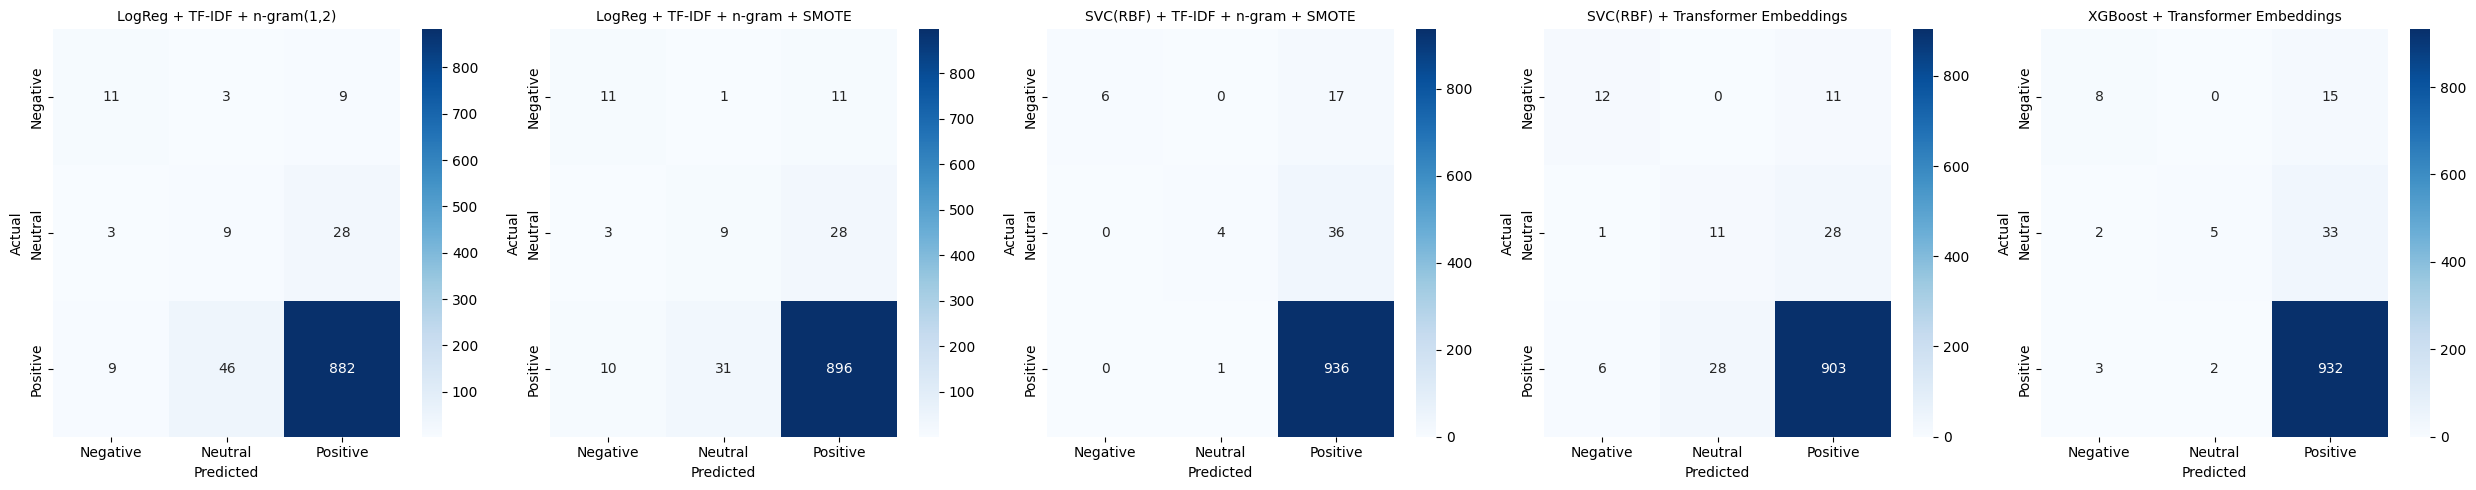

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Labels
labels = ['Negative', 'Neutral', 'Positive']

# Confusion matrices
cms = {
    "LogReg + TF-IDF + n-gram(1,2)": np.array([[11, 3, 9],
                                                [3, 9, 28],
                                                [9, 46, 882]]),
    
    "LogReg + TF-IDF + n-gram + SMOTE": np.array([[11, 1, 11],
                                                  [3, 9, 28],
                                                  [10, 31, 896]]),
    
    "SVC(RBF) + TF-IDF + n-gram + SMOTE": np.array([[6, 0, 17],
                                                    [0, 4, 36],
                                                    [0, 1, 936]]),
    
    "SVC(RBF) + Transformer Embeddings": np.array([[12, 0, 11],
                                                   [1, 11, 28],
                                                   [6, 28, 903]]),
    
    "XGBoost + Transformer Embeddings": np.array([[8, 0, 15],
                                                  [2, 5, 33],
                                                  [3, 2, 932]])
}

# Plotting all confusion matrices side by side
fig, axes = plt.subplots(1, 5, figsize=(25,5))

for ax, (title, cm) in zip(axes, cms.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_title(title, fontsize=10)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


### 2. Bar chart

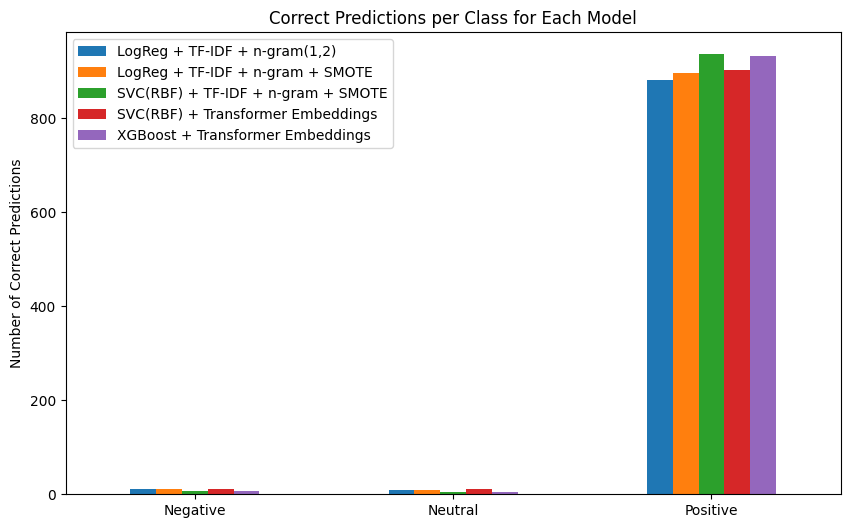

In [128]:
# Correct predictions per class (diagonal)
correct_preds = {model: np.diag(cm) for model, cm in cms.items()}

# Convert to DataFrame
import pandas as pd
df_correct = pd.DataFrame(correct_preds, index=labels)
df_correct.plot(kind='bar', figsize=(10,6))
plt.ylabel("Number of Correct Predictions")
plt.title("Correct Predictions per Class for Each Model")
plt.xticks(rotation=0)
plt.show()
